In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")


In [78]:

df = pd.read_csv("survey.csv")  
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [79]:
df = df.dropna(thresh=len(df) * 0.5, axis=1)

# Fill missing values
for col in df.select_dtypes(include='object').columns:
    df[col].fillna('Unknown', inplace=True)
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)


In [80]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [81]:
X = df.drop('treatment', axis=1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [82]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [83]:

from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
                              cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print(" Best Random Forest Parameters:", grid_search_rf.best_params_)

 Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [150]:
from sklearn.metrics import accuracy_score, classification_report
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_pred_best_rf = best_rf.predict(X_test)
print("🔸 Untuned RF Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("🔹 Tuned RF Accuracy:", round(accuracy_score(y_test, y_pred_best_rf), 4))
print("\nUntuned RF Report:\n", classification_report(y_test, y_pred_rf))
print("\nTuned RF Report:\n", classification_report(y_test, y_pred_best_rf))

🔸 Untuned RF Accuracy: 0.7976
🔹 Tuned RF Accuracy: 0.8333

Untuned RF Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       124
           1       0.79      0.81      0.80       128

    accuracy                           0.80       252
   macro avg       0.80      0.80      0.80       252
weighted avg       0.80      0.80      0.80       252


Tuned RF Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       124
           1       0.82      0.86      0.84       128

    accuracy                           0.83       252
   macro avg       0.83      0.83      0.83       252
weighted avg       0.83      0.83      0.83       252



In [85]:
y_pred_rf = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred_rf))


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       124
           1       0.79      0.81      0.80       128

    accuracy                           0.80       252
   macro avg       0.80      0.80      0.80       252
weighted avg       0.80      0.80      0.80       252



In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification  
rf_model = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Random Forest 5-Fold Cross-Validation Accuracies:", rf_cv_scores.mean())


Random Forest 5-Fold Cross-Validation Accuracies: 0.7799721747928918


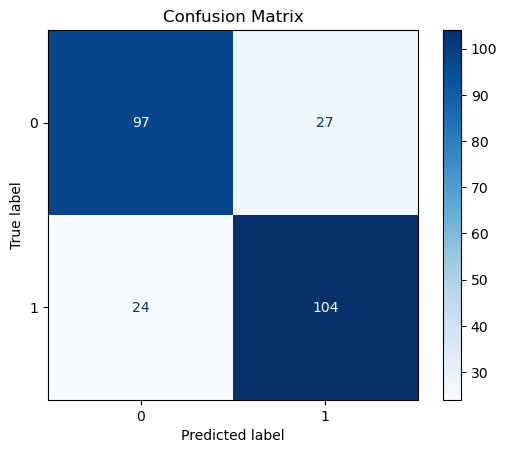

In [87]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()



Top 10 Important Features:

work_interfere    0.283922
family_history    0.085544
Timestamp         0.080850
Age               0.062909
care_options      0.043630
state             0.043072
Gender            0.040515
no_employees      0.037268
Country           0.035956
benefits          0.029026
dtype: float64


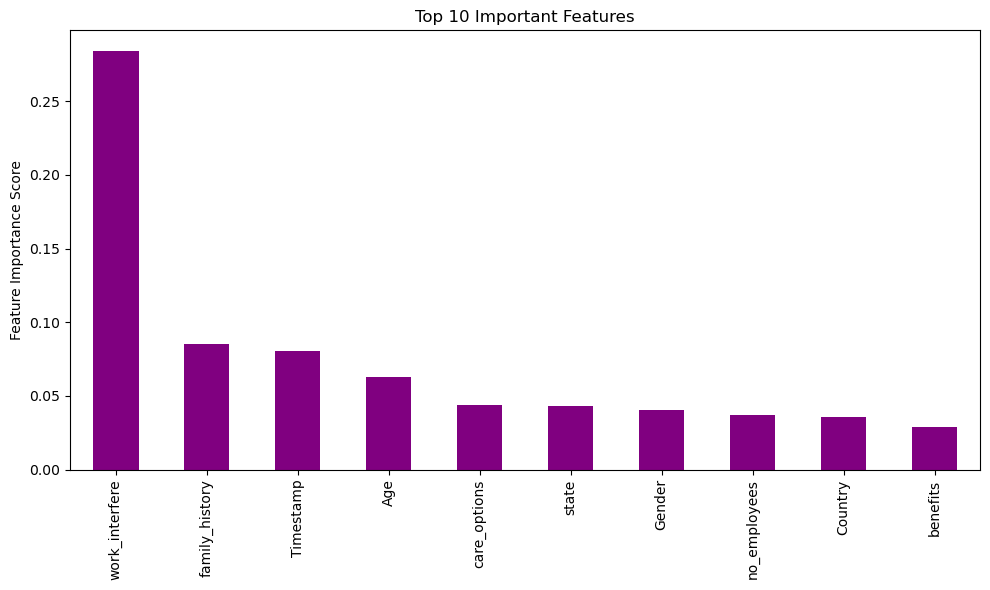

In [88]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:\n")
print(importances.head(10))


plt.figure(figsize=(10, 6))
importances.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Important Features')
plt.ylabel('Feature Importance Score')
plt.tight_layout()
plt.show()


In [89]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [90]:
y_pred_lr = lr_model.predict(X_test)


In [91]:
from sklearn.linear_model import LogisticRegression
param_grid_lr = {
    'penalty': ['l1', 'l2'],         
    'C': [0.01, 0.1, 1, 10, 100],    
    'solver': ['liblinear'],         
}


lr_model = LogisticRegression(random_state=42)

grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
print("Best Parameters (Logistic Regression):", grid_search_lr.best_params_)


Best Parameters (Logistic Regression): {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [92]:
y_pred_lr = lr_model.fit(X_train, y_train).predict(X_test)         
y_pred_best_lr = best_lr.predict(X_test)                           

print("🔹 Untuned Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_lr), 4))
print("🔹 Tuned Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_best_lr), 4))

print("\nUntuned Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("\nTuned Logistic Regression Report:\n", classification_report(y_test, y_pred_best_lr))


🔹 Untuned Logistic Regression Accuracy: 0.6825
🔹 Tuned Logistic Regression Accuracy: 0.6786

Untuned Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69       124
           1       0.70      0.66      0.68       128

    accuracy                           0.68       252
   macro avg       0.68      0.68      0.68       252
weighted avg       0.68      0.68      0.68       252


Tuned Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.66      0.73      0.69       124
           1       0.70      0.63      0.67       128

    accuracy                           0.68       252
   macro avg       0.68      0.68      0.68       252
weighted avg       0.68      0.68      0.68       252



In [152]:
print("\nLogistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr))



Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       124
           1       0.70      0.66      0.68       128

    accuracy                           0.68       252
   macro avg       0.68      0.68      0.68       252
weighted avg       0.68      0.68      0.68       252



In [154]:
log_scores = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')
print("Logistic Regression 5-Fold CV Accuracy:", log_scores.mean())


Logistic Regression 5-Fold CV Accuracy: 0.6664105482830582


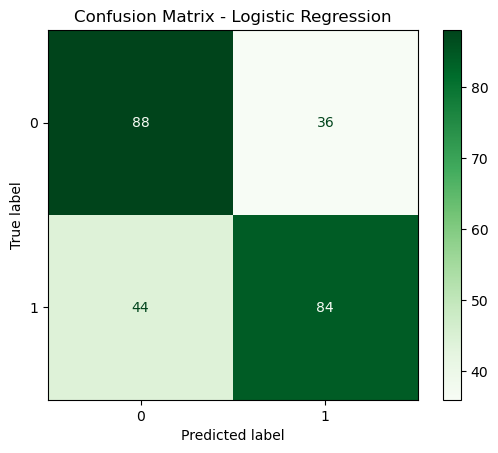

In [156]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr)
disp_lr.plot(cmap="Greens")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


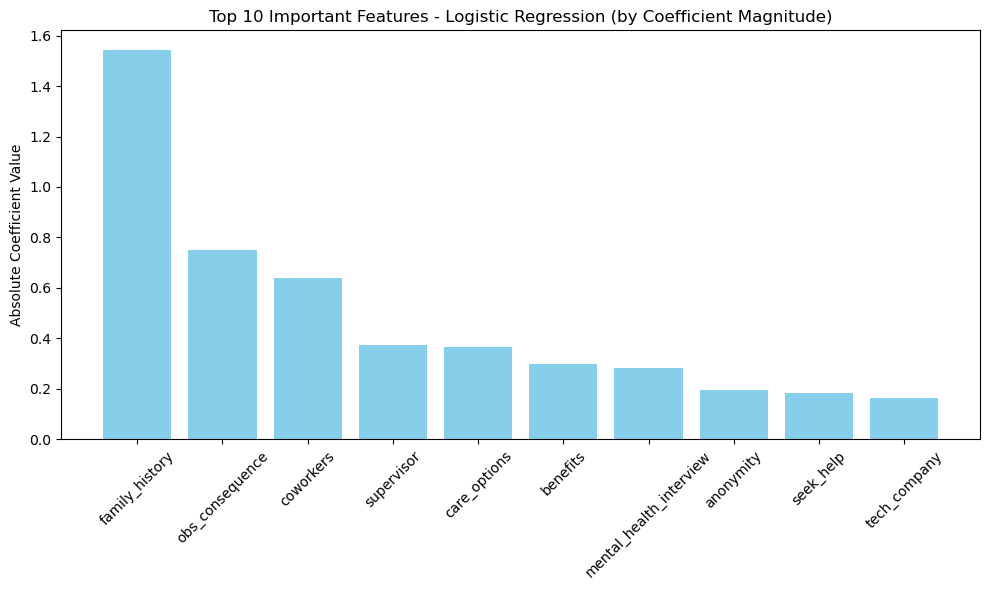

In [160]:

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


feature_names = X_train.columns  
coefficients = log_model.coef_[0]  


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10,6))
plt.bar(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.title('Top 10 Important Features - Logistic Regression (by Coefficient Magnitude)')
plt.ylabel('Absolute Coefficient Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [97]:
!pip install xgboost
from xgboost import XGBClassifier



In [98]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [99]:
y_pred_xgb = xgb_model.predict(X_test)


In [162]:
from xgboost import XGBClassifier
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb,
                                param_grid=param_grid_xgb,
                                cv=5,
                                scoring='accuracy',
                                verbose=1,
                                n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_
print("Best Parameters (XGBoost):", grid_search_xgb.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters (XGBoost): {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}


In [164]:

xgb_untuned = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_untuned.fit(X_train, y_train)

y_pred_xgb = xgb_untuned.predict(X_test)         
y_pred_best_xgb = best_xgb.predict(X_test)       


print("🔸 Untuned XGBoost Accuracy:", round(accuracy_score(y_test, y_pred_xgb), 4))
print("🔹 Tuned XGBoost Accuracy:", round(accuracy_score(y_test, y_pred_best_xgb), 4))


print("\nUntuned XGBoost Report:\n", classification_report(y_test, y_pred_xgb))
print("\nTuned XGBoost Report:\n", classification_report(y_test, y_pred_best_xgb))


🔸 Untuned XGBoost Accuracy: 0.8056
🔹 Tuned XGBoost Accuracy: 0.8135

Untuned XGBoost Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       124
           1       0.80      0.82      0.81       128

    accuracy                           0.81       252
   macro avg       0.81      0.81      0.81       252
weighted avg       0.81      0.81      0.81       252


Tuned XGBoost Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       124
           1       0.80      0.84      0.82       128

    accuracy                           0.81       252
   macro avg       0.81      0.81      0.81       252
weighted avg       0.81      0.81      0.81       252



In [102]:
print("\nXGBoost Report:\n")
print(classification_report(y_test, y_pred_xgb))



XGBoost Report:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       124
           1       0.80      0.82      0.81       128

    accuracy                           0.81       252
   macro avg       0.81      0.81      0.81       252
weighted avg       0.81      0.81      0.81       252



In [103]:
xgb_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print("XGBoost 5-Fold CV Accuracy:", xgb_scores.mean())


XGBoost 5-Fold CV Accuracy: 0.7752229178523999


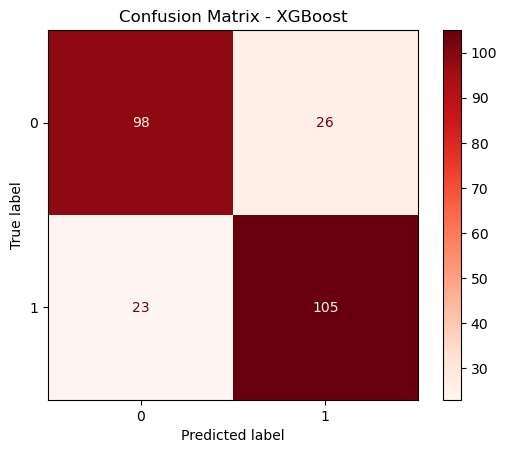

In [104]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb)
disp_xgb.plot(cmap="Reds")
plt.title("Confusion Matrix - XGBoost")
plt.show()



Top 10 Important Features for XGBoost:

work_interfere      0.287314
family_history      0.067611
tech_company        0.044632
benefits            0.041191
obs_consequence     0.039545
anonymity           0.036509
Gender              0.032555
coworkers           0.031360
wellness_program    0.030320
Country             0.030303
dtype: float32


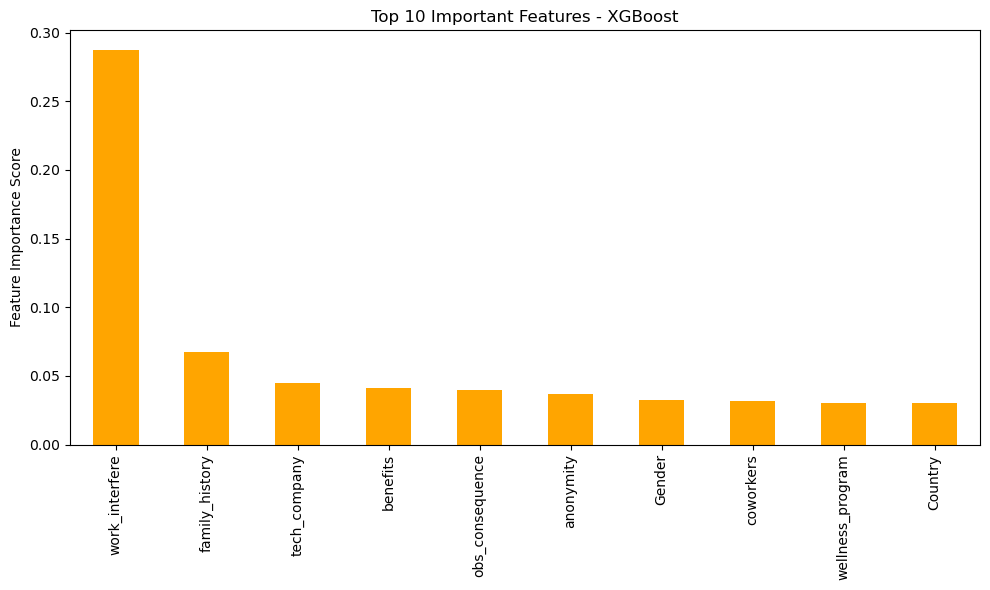

In [105]:
importances_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features for XGBoost:\n")
print(importances_xgb.head(10))

plt.figure(figsize=(10,6))
importances_xgb.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Important Features - XGBoost')
plt.ylabel('Feature Importance Score')
plt.tight_layout()
plt.show()


In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [107]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}


In [108]:
metrics["Model"].append("Logistic Regression")
metrics["Accuracy"].append(accuracy_score(y_test, y_pred_lr))
metrics["Precision"].append(precision_score(y_test, y_pred_lr))
metrics["Recall"].append(recall_score(y_test, y_pred_lr))
metrics["F1-Score"].append(f1_score(y_test, y_pred_lr))


In [109]:
metrics["Model"].append("Random Forest")
metrics["Accuracy"].append(accuracy_score(y_test, y_pred_rf))
metrics["Precision"].append(precision_score(y_test, y_pred_rf))
metrics["Recall"].append(recall_score(y_test, y_pred_rf))
metrics["F1-Score"].append(f1_score(y_test, y_pred_rf))

In [110]:
metrics["Model"].append("XGBoost")
metrics["Accuracy"].append(accuracy_score(y_test, y_pred_xgb))
metrics["Precision"].append(precision_score(y_test, y_pred_xgb))
metrics["Recall"].append(recall_score(y_test, y_pred_xgb))
metrics["F1-Score"].append(f1_score(y_test, y_pred_xgb))


In [111]:
comparison_df = pd.DataFrame(metrics)
print(comparison_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.682540   0.700000  0.656250  0.677419
1        Random Forest  0.797619   0.793893  0.812500  0.803089
2              XGBoost  0.805556   0.801527  0.820312  0.810811


In [166]:
from sklearn.metrics import roc_curve, auc

In [168]:
y_prob_rf = model.predict_proba(X_test)[:,1]

In [170]:
y_prob_lr = lr_model.predict_proba(X_test)[:,1]

In [172]:
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

In [174]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

In [176]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)

In [178]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

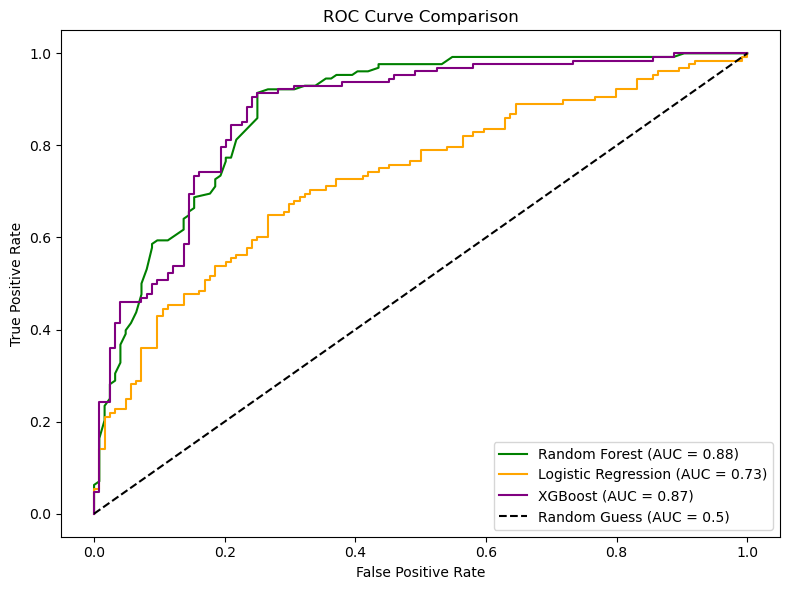

In [180]:

plt.figure(figsize=(8,6))

plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, color='orange', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='purple', label=f'XGBoost (AUC = {auc_xgb:.2f})')

plt.plot([0,1], [0,1], 'k--', label='Random Guess (AUC = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()